# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 14.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
177943,1.3550,0.2100,0.0952,0.0537,0.0513,0.0586,0.0513,0.2148,0.0586,0.0903,2,2,10,10
423271,0.3931,0.0952,0.0098,0.0024,0.0024,0.0073,0.1221,0.2271,0.0024,0.2173,0,0,0,0
37794,0.5200,0.0854,0.0073,0.0024,0.0024,0.0024,0.0244,0.2588,0.0024,0.0757,0,0,0,0
269730,0.1318,0.0195,0.0024,0.0024,0.0024,0.0024,0.0293,0.0708,0.0024,0.0488,0,0,0,0
165562,0.0635,0.0024,0.0024,0.0024,0.0024,0.0024,0.0049,0.0513,0.0024,0.0024,0,0,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461607 entries, 0 to 461606
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          461607 non-null  float64
 1   Emg2          461607 non-null  float64
 2   Emg3          461607 non-null  float64
 3   Emg4          461607 non-null  float64
 4   Emg5          461607 non-null  float64
 5   Emg6          461607 non-null  float64
 6   Emg7          461607 non-null  float64
 7   Emg8          461607 non-null  float64
 8   Emg9          461607 non-null  float64
 9   Emg10         461607 non-null  float64
 10  repetition    461607 non-null  int64  
 11  rerepetition  461607 non-null  int64  
 12  stimulus      461607 non-null  int64  
 13  restimulus    461607 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.3 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000
mean,0.562477,0.171519,0.099438,0.062419,0.029975,0.052018,0.200229,0.255614,0.076876,0.212711,3.195770,2.497919,5.663920,4.565063
std,0.579902,0.276268,0.182943,0.130411,0.059618,0.106883,0.360185,0.212620,0.184109,0.308897,3.486784,3.364923,6.588134,6.471103
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.117200,0.002400,0.002400,0.002400,0.002400,0.002400,0.019500,0.144000,0.002400,0.017100,0.000000,0.000000,0.000000,0.000000
50%,0.368700,0.065900,0.017100,0.002400,0.002400,0.007300,0.075700,0.217300,0.002400,0.090300,2.000000,0.000000,3.000000,0.000000
75%,0.849600,0.229500,0.122100,0.061000,0.029300,0.063500,0.231900,0.280800,0.073200,0.285600,6.000000,5.000000,10.000000,9.000000
max,4.668000,3.747600,2.961400,2.023900,0.808100,2.138700,4.663100,3.269000,3.242200,4.602100,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     193393
2      15514
12     15509
8      15507
7      15504
4      15501
5      15476
9      15465
6      15462
11     15461
3      15452
1      15435
10     15432
17     10343
13     10342
14     10337
15     10300
16     10263
19      5171
21      5163
18      5161
20      5147
22      5138
23      5131
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.988147,-0.646013,-0.5726,-0.502583,-0.507703,-0.500424,-0.582304,-0.214103,-0.439773,-0.728270
1,-0.988147,-0.646013,-0.5726,-0.484632,-0.507703,-0.500424,-0.582304,-0.224728,-0.439773,-0.728270
2,-0.988147,-0.646013,-0.5726,-0.502583,-0.507703,-0.500424,-0.582304,-0.257046,-0.439773,-0.728270
3,-0.988147,-0.646013,-0.5726,-0.502583,-0.507703,-0.500424,-0.582304,-0.268113,-0.439773,-0.728270
4,-0.988147,-0.646013,-0.5726,-0.502583,-0.507703,-0.500424,-0.582304,-0.268113,-0.439773,-0.728270
...,...,...,...,...,...,...,...,...,...,...
390409,-0.625458,-0.587770,-0.5726,-0.502583,-0.507703,-0.414658,-0.512431,-0.873299,-0.439773,-0.526364
390410,-0.556980,-0.595944,-0.5726,-0.502583,-0.507703,-0.393654,-0.493470,-0.851606,-0.439773,-0.481700
390411,-0.528763,-0.612634,-0.5726,-0.502583,-0.507703,-0.350771,-0.468014,-0.862674,-0.439773,-0.451720
390412,-0.524803,-0.620809,-0.5726,-0.502583,-0.507703,-0.286009,-0.455287,-0.862674,-0.439773,-0.451720


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
78/78 [==============================] - 4s 28ms/step - loss: 1.4456 - accuracy: 0.6205 - val_loss: 1.2810 - val_accuracy: 0.6485
Epoch 2/100
78/78 [==============================] - 2s 25ms/step - loss: 1.0397 - accuracy: 0.7157 - val_loss: 1.1574 - val_accuracy: 0.7074
Epoch 3/100
78/78 [==============================] - 2s 25ms/step - loss: 0.8854 - accuracy: 0.7532 - val_loss: 1.5641 - val_accuracy: 0.4689
Epoch 4/100
78/78 [==============================] - 2s 26ms/step - loss: 0.8931 - accuracy: 0.7550 - val_loss: 0.9131 - val_accuracy: 0.7649
Epoch 5/100
78/78 [==============================] - 2s 26ms/step - loss: 0.7547 - accuracy: 0.7855 - val_loss: 0.7548 - val_accuracy: 0.7840
Epoch 6/100
78/78 [==============================] - 2s 25ms/step - loss: 0.7028 - accuracy: 0.7963 - val_loss: 0.7255 - val_accuracy: 0.7866
Epoch 7/100
78/78 [==============================] - 2s 25ms/step - loss: 0.6546 - accuracy: 0.8090 - val_loss: 0.8126 - val_accuracy: 0.7587
Epoch 

78/78 [==============================] - 2s 26ms/step - loss: 0.2004 - accuracy: 0.9383 - val_loss: 0.3327 - val_accuracy: 0.8965
Epoch 59/100
78/78 [==============================] - 2s 26ms/step - loss: 0.2123 - accuracy: 0.9355 - val_loss: 0.2317 - val_accuracy: 0.9329
Epoch 60/100
78/78 [==============================] - 2s 28ms/step - loss: 0.1827 - accuracy: 0.9440 - val_loss: 0.2595 - val_accuracy: 0.9244
Epoch 61/100
78/78 [==============================] - 2s 27ms/step - loss: 0.2008 - accuracy: 0.9383 - val_loss: 0.2722 - val_accuracy: 0.9216
Epoch 62/100
78/78 [==============================] - 2s 26ms/step - loss: 0.2326 - accuracy: 0.9295 - val_loss: 0.2604 - val_accuracy: 0.9248
Epoch 63/100
78/78 [==============================] - 2s 27ms/step - loss: 0.2100 - accuracy: 0.9354 - val_loss: 0.2170 - val_accuracy: 0.9351
Epoch 64/100
78/78 [==============================] - 2s 27ms/step - loss: 0.1798 - accuracy: 0.9441 - val_loss: 0.2223 - val_accuracy: 0.9335
Epoch 65/100

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

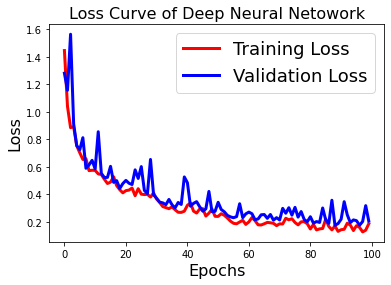

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

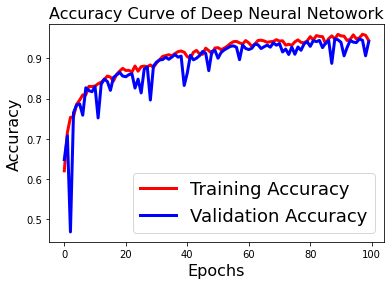

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([23,  4,  1, ..., 13,  8,  0], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

4

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 94.08193845011078


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     37515
           1       0.98      0.98      0.98      2235
           2       0.93      0.92      0.92      2340
           3       0.96      0.90      0.93      2154
           4       0.97      0.90      0.93      2186
           5       0.94      0.90      0.92      2062
           6       0.83      0.96      0.89      2329
           7       0.92      0.87      0.90      2264
           8       0.91      0.88      0.90      2354
           9       0.93      0.87      0.90      2352
          10       0.96      0.89      0.92      2117
          11       0.91      0.90      0.90      2378
          12       0.89      0.92      0.91      2567
          13       0.94      0.94      0.94      1473
          14       0.93      0.91      0.92      1438
          15       0.91      0.89      0.90      1529
          16       0.95      0.93      0.94      1614
 

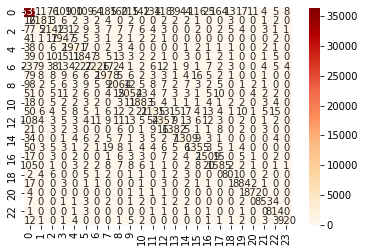

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.4661962270916845
MSE: 5.182895124418888
RMSE: 2.2765972688244376


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.9413077472484624
Recall Score :  0.9408193845011078
f1_score :  0.9406873219350874
